In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 10 13:17:46 2022

@author: BetzLab-Admin
"""

import sys
sys.path.append('../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
from MBR_calculation import mean_back_realxation, b_distribution
from clean_trajectories import clean_trajectory
#from pipython.datarectools import getservotime
import cv2
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
frequencies = [1, 5, 10, 25]  # Frequencies in kHz.
trajectory_types = ['corr', 'mean', 'gauss_0', 'gauss_1']

exclusion_factor_list = [1,2]

# Dictionary to store MBRs for each trajectory type
MBR_dict = {}

for trajectory_type in trajectory_types:
    MBR_lists = []
    for f in frequencies:
        data_path = rf'\\134.76.13.158\betzlab\Julian\Hydrogel\measurement_2\{f}_khz\{trajectory_type}\x_trajecories.npy'
        f = f * 1000  # Convert to Hz
        x_trajectory = np.load(data_path)
        dt = 1/f
        
        MBR_list = []
        for exclusion_factor in exclusion_factor_list:
            MBR_list.append(mean_back_realxation(dt, x_trajectory, dt,dt * 1000, multiplier=exclusion_factor))
        MBR_lists.append(MBR_list)
    
    # Store the MBR lists for this trajectory type in the dictionary
    MBR_dict[trajectory_type] = MBR_lists


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 109.24it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 666.58it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 105.73it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 563.88it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 113.74it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 572.32it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 109.64it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 522.49it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 110.95it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 586.47it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 109.08it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 585.54it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 109.44it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 592.70it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 111.95it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 540.92it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 115.59it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 537.33it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 112.74it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 588.51it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 112.69it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 613.42it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 111.81it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 561.24it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 110.78it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 616.75it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 110.45it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 587.41it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 111.96it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 577.66it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 114.24it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 570.65it/s]


In [3]:

for trajectory_type in trajectory_types:
    MBR_lists = []
    for f in frequencies:
        data_path = rf'\\134.76.13.158\betzlab\Julian\Hydrogel\measurement_2\{f}_khz\{trajectory_type}\x_trajecories.npy'
        f = f * 1000  # Convert to Hz
        x_trajectory = np.load(data_path)

        print(f'Calculating b distribution for {trajectory_type} at {f} Hz')
        dt = 1/f
        b_dist = b_distribution(x_trajectory, dt, dt)
        print(b_dist)

Calculating b distribution for corr at 1000 Hz
0.04719029780536729
Calculating b distribution for corr at 5000 Hz
0.04497898384737007
Calculating b distribution for corr at 10000 Hz
0.030834180436677506
Calculating b distribution for corr at 25000 Hz
0.043144888991703774
Calculating b distribution for mean at 1000 Hz
0.05073035092005896
Calculating b distribution for mean at 5000 Hz
0.1775422387983388
Calculating b distribution for mean at 10000 Hz
0.48506525535789163
Calculating b distribution for mean at 25000 Hz
0.1752878632309415
Calculating b distribution for gauss_0 at 1000 Hz
0.04998548266520947
Calculating b distribution for gauss_0 at 5000 Hz
0.047760653372412136
Calculating b distribution for gauss_0 at 10000 Hz
0.02942195070429772
Calculating b distribution for gauss_0 at 25000 Hz
0.04094268025660796
Calculating b distribution for gauss_1 at 1000 Hz
0.04821815178217574
Calculating b distribution for gauss_1 at 5000 Hz
0.03660062794255893
Calculating b distribution for gauss_

In [4]:
import matplotlib.pyplot as plt

# Number of trajectory types and frequencies
n_types = len(trajectory_types)
n_freqs = len(frequencies)

# Create subplots with multiple rows (one for each trajectory type)
fig, axes = plt.subplots(n_types, n_freqs, figsize=(15, 5*n_types), sharey=True)

# Loop through each trajectory type and frequency to plot MBRs
for row, trajectory_type in enumerate(trajectory_types):
    MBR_lists = MBR_dict[trajectory_type]
    for col, (MBR_list, freq) in enumerate(zip(MBR_lists, frequencies)):
        for i, MBR in enumerate(MBR_list):
            dt = 1 / freq / 1000
            times = np.arange(0, len(MBR)) * dt
            axes[row, col].plot(times, MBR, label=f'exclusion factor:{exclusion_factor_list[i]}')
            axes[row, col].axhline(0.5, color='red', linestyle='--', label='Equilibrium' if i == 1 else None)
        if row == 0:
            axes[row, col].set_title(f'{freq} kHz')
        if col == 0:
            axes[row, col].set_ylabel(f'{trajectory_type} MBR')
        if row == n_types - 1:
            axes[row, col].set_xlabel('time [s]')
        # Set the xlim based on the data for the given frequency
        max_time = times[-1]
        axes[row, col].set_xlim(0, max_time)

# Display the legend on the top right plot
axes[0, -1].legend()

plt.tight_layout()
plt.show()


In [2]:
frequencies = [1, 5, 10, 25]  # Frequencies in kHz.
trajectory_types = ['corr', 'mean', 'gauss_0', 'gauss_1']

exclusion_factor_list = [1,2]

# Dictionary to store MBRs for each trajectory type
MBR_dict_corrected = {}

for trajectory_type in trajectory_types:
    MBR_lists = []
    for f in frequencies:
        data_path = rf'\\134.76.13.158\betzlab\Julian\Hydrogel\measurement_2\{f}_khz\{trajectory_type}\x_trajecories.npy'

        x_trajectory = np.load(data_path)
        x_trajectory = clean_trajectory(x_trajectory,f, N=1, bin_size=10)
        f = f * 1000  # Convert to Hz
        dt = 1/f
        
        MBR_list = []
        for exclusion_factor in exclusion_factor_list:
            MBR_list.append(mean_back_realxation(dt, x_trajectory, dt,dt * 1000, multiplier=exclusion_factor))
        MBR_lists.append(MBR_list)
    
    # Store the MBR lists for this trajectory type in the dictionary
    MBR_dict_corrected[trajectory_type] = MBR_lists

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\experiments\hydrogel_measurements\../../lib\clean_trajectories.py:47: RuntimeWarning: invalid value encountered in log
  return np.log(np.exp(a* x + b)+c)


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 108.50it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 442.85it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 101.78it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 518.31it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 106.83it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 559.05it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 112.87it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 597.32it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 107.14it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 567.55it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 109.16it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 569.43it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 106.82it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 585.93it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 107.78it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 571.14it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 107.52it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 525.64it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 108.21it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 536.86it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 104.26it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 556.19it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 109.88it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 614.58it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 105.65it/s]


Segment size: 1000


Processing segments: 100%|██████████| 74/74 [00:00<00:00, 533.24it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 111.27it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 576.78it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 107.47it/s]


Segment size: 1000


Processing segments: 100%|██████████| 98/98 [00:00<00:00, 543.88it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 108.16it/s]


Segment size: 999


Processing segments: 100%|██████████| 99/99 [00:00<00:00, 546.49it/s]


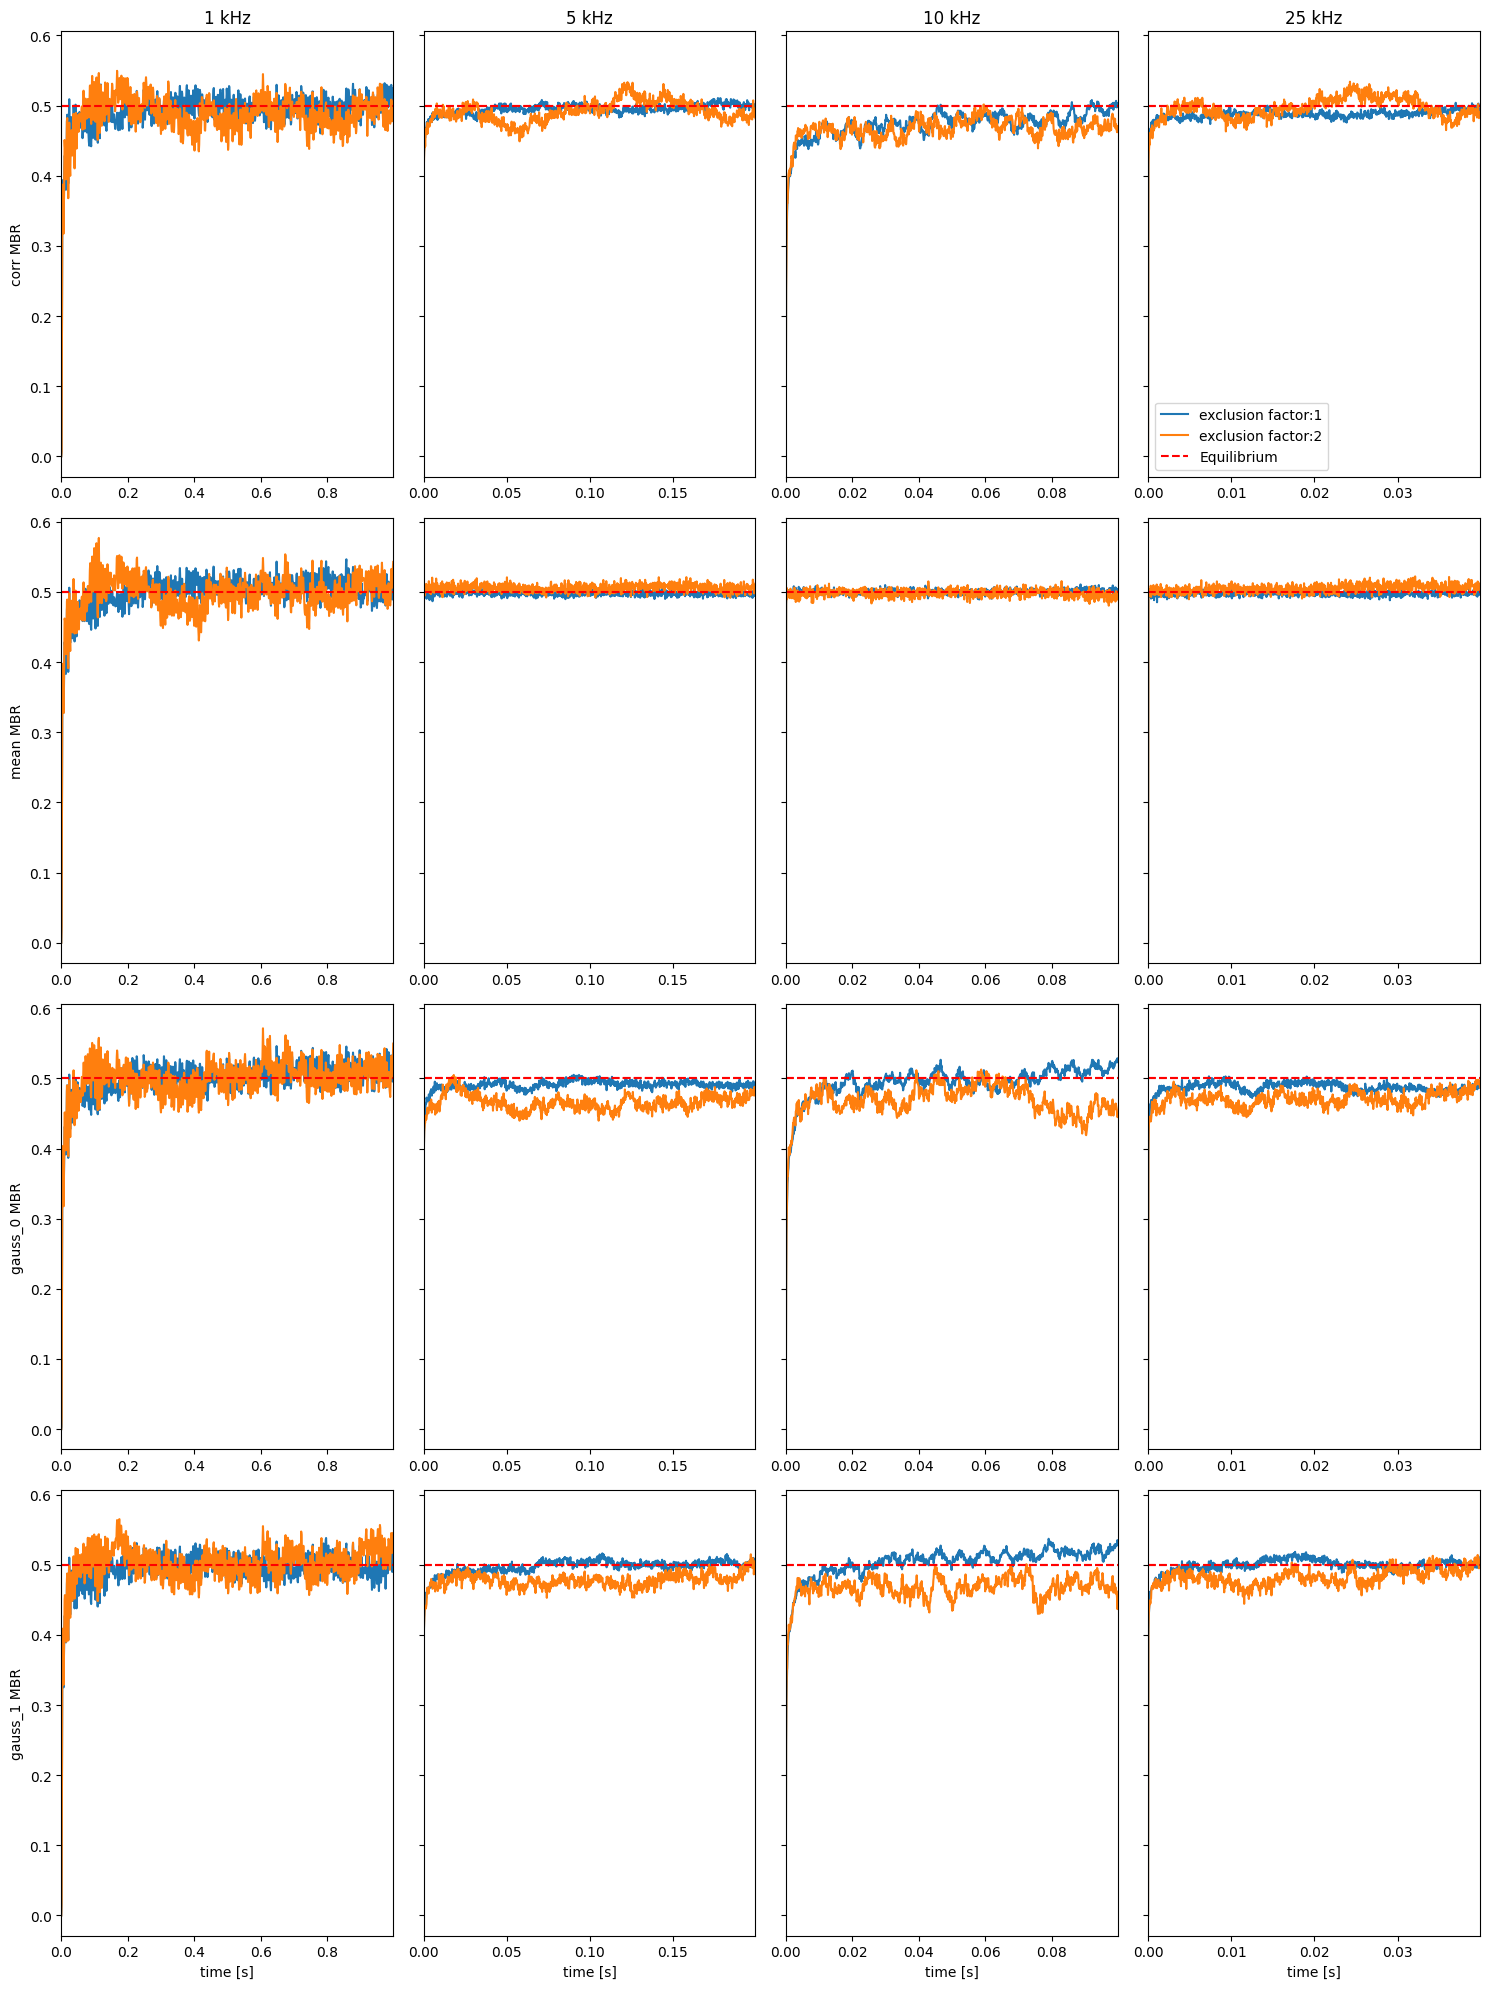

In [3]:
import matplotlib.pyplot as plt

# Number of trajectory types and frequencies
n_types = len(trajectory_types)
n_freqs = len(frequencies)

# Create subplots with multiple rows (one for each trajectory type)
fig, axes = plt.subplots(n_types, n_freqs, figsize=(15, 5*n_types), sharey=True)

# Loop through each trajectory type and frequency to plot MBRs
for row, trajectory_type in enumerate(trajectory_types):
    MBR_lists = MBR_dict_corrected[trajectory_type]
    for col, (MBR_list, freq) in enumerate(zip(MBR_lists, frequencies)):
        for i, MBR in enumerate(MBR_list):
            dt = 1 / freq / 1000
            times = np.arange(0, len(MBR)) * dt
            axes[row, col].plot(times, MBR, label=f'exclusion factor:{exclusion_factor_list[i]}')
            axes[row, col].axhline(0.5, color='red', linestyle='--', label='Equilibrium' if i == 1 else None)
        if row == 0:
            axes[row, col].set_title(f'{freq} kHz')
        if col == 0:
            axes[row, col].set_ylabel(f'{trajectory_type} MBR')
        if row == n_types - 1:
            axes[row, col].set_xlabel('time [s]')
        # Set the xlim based on the data for the given frequency
        max_time = times[-1]
        axes[row, col].set_xlim(0, max_time)

# Display the legend on the top right plot
axes[0, -1].legend()

plt.tight_layout()
plt.show()


In [69]:
exclusion_factor_list = [.1,.5,1]
MBR_list = []
for exclusion_factor in exclusion_factor_list:
    MBR_list.append(mean_back_realxation(dt, x_trajectory, dt, dt*100,multiplier = exclusion_factor))
#plot the results
plt.figure()
for i,MBR in enumerate(MBR_list):
    plt.plot(MBR,label = f'{exclusion_factor_list[i]}')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('MBR')
plt.title(f'MBR for different exclusion factors at {f} kHz')


Segment size: 100


Processing segments: 100%|██████████| 998/998 [00:00<00:00, 2390.02it/s]


Segment size: 100


Processing segments: 100%|██████████| 998/998 [00:00<00:00, 2514.84it/s]


Segment size: 100


Processing segments: 100%|██████████| 998/998 [00:00<00:00, 3746.01it/s]


Text(0.5, 1.0, 'MBR for different exclusion factors at 5 kHz')

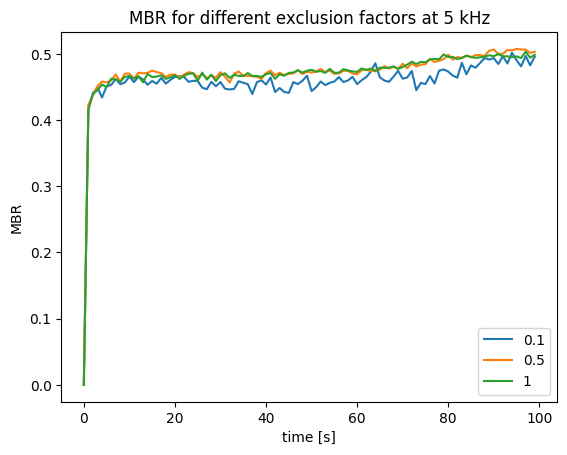

In [72]:
#plot the results
plt.figure()
for i,MBR in enumerate(MBR_list):
    plt.plot(MBR,label = f'{exclusion_factor_list[i]}')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('MBR')
plt.title(f'MBR for different exclusion factors at {f} kHz')

In [70]:
times = np.arange(0, len(MBR)*dt, dt)
plt.plot(times,MBR)
plt.xlabel('time [s]')

Text(0.5, 0, 'time [s]')